In [4]:
%%html
  <!DOCTYPE html>
  <html lang="en">
  <head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Test</title>
    <script type="module" src="https://cdn.jsdelivr.net/npm/@ionic/core/dist/ionic/ionic.esm.js"></script>
    <script nomodule src="https://cdn.jsdelivr.net/npm/@ionic/core/dist/ionic/ionic.js"></script>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@ionic/core/css/ionic.bundle.css" />
  </head>
  <body>
    <ion-app>
      <ion-header translucent > <!-- class="ion-no-border" -->
        <ion-toolbar>
          <ion-title>CryptoVoxels Guestbook Locations!</ion-title>
        </ion-toolbar> 
      </ion-header>,
      <ion-content fullscreen class="ion-padding"> 
        <!-- 
          # https://github.com/ionic-team/ionic-docs/blob/legacy/src/demos/api/content/index.html 
          # https://github.com/ionic-team/ionic-docs/blob/legacy/src/demos/api/infinite-scroll/index.html
          # https://github.com/ionic-team/ionic-docs/blob/legacy/src/demos/api/back-button/index.html
        -->

In [5]:
%%html
<style>
  /*
  :root {
    --ion-safe-area-top: 2px;
    --ion-safe-area-bottom: 22px;
  }
  details{padding-bottom:8px}
  summary>*{ display:inline-block }
  h2, h3 {text-align: center; }
  details > summary > h3 {display: inline;}
  summary::marker { content: "🧡 "; }
  */
  h2, h3 {
    display: inline-block;
  }
  body { text-align: center; } 
  
  ion-content > div { margin-left: 25%; padding-top: 40px;  padding-bottom: 40px; }

</style> 

# CryptoVoxels Guestbook!

I love freebies. And in my opinion, guestbooks are the ticket to a bunch of em!

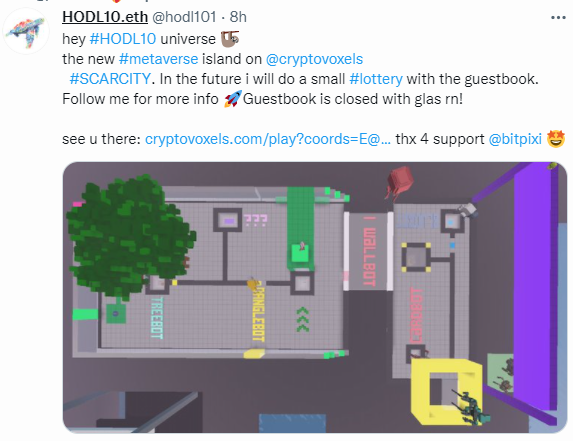

So now I want to sign all the CV guestbooks.  How can I do that?

[VC Analytics](https://www.k1ic.com/cvb-zh.html)

## Step 1. Download all parcels

In [1]:
#hide 
import sys
sys.path.append('/workspaces/3Diot.github.io/blog/')
sys.path.append('/workspaces/3Diot.github.io/docs/datasets/')

In [2]:
#hide 
# cd ./datasets/features

In [3]:
#hide_input 
import requests
import json
import pandas as pd
url = 'https://www.cryptovoxels.com/api/parcels/search.json'
r = requests.get(url)
parcels = json.loads(r.text)['parcels']
parcels = pd.json_normalize(data=parcels)

In [ ]:
# Save a new copy of each record
#for index, row in df.iterrows():
#  url = 'https://www.cryptovoxels.com/api/parcels/'+str(row['id'])+'.json'

In [ ]:
{'type': 'guest-book',
    'scale': [1, 1, 1],
    'signature_text': 'Welcome!',
    'position': [-0.25, 28.25, 0.25],
    'rotation': [0, 0, 0],
    'version': '14648',
    'uuid': 'fa252c81-5f7e-4b87-b010-94ca0ffdce16'}

In [60]:
import requests
import json

deets = [] 
url = 'https://www.cryptovoxels.com/api/parcels/6463.json'
r = requests.get(url)
data = json.loads(r.text)
data = data['parcel'] 
discoverable_features = list(filter(lambda x: x['type'] == 'guest-book', data['content']['features']))
for discoverable_feature in discoverable_features:
  position = discoverable_feature['position']
  coords = data['geometry']['coordinates'][0]
  n = len(coords) 
  centroid = ( sum([p[0] for p in coords])/ n, sum([p[1] for p in coords] )/ n )
  print(centroid[0], position)
  x = str(centroid[0]*100+position[0]-.5).replace('-', '')[:5]+'W' if str(centroid[0]).startswith("-") else str(centroid[0]*100+position[0]-.5)[:5]+'E';
  y = str(centroid[1]*100+position[2]-1).replace('-', '')[:5]+'S' if str(centroid[1]).startswith("-") else str(centroid[1]*100+position[2]-1)[:5]+'N';
  x = x.replace('.', ''); y = y.replace('.', '');
  
  deets.append( 
    { 'owner': data['owner'], 
      'parcel': data['id'],  
      'location': 'https://www.cryptovoxels.com/play?coords=W@'+x+','+y+','+str(position[1]-2)+'F',
    } 
  )

14.483939997000002 [2, 28.25, 4]


subtract 2 - from height 
add x
subtract y

In [61]:
deets

[{'owner': '0x7b19b42564ad1c03625e8306cf20deea2f923a67',
  'parcel': 6463,
  'location': 'https://www.cryptovoxels.com/play?coords=W@1449E,1110S,26.25F'}]

In [53]:
deets

[{'owner': '0x7b19b42564ad1c03625e8306cf20deea2f923a67',
  'parcel': 6463,
  'location': 'https://www.cryptovoxels.com/play?coords=W@1448E,1111S,25.25F'}]

In [14]:
# Ala https://wiki.cryptovoxels.com/en/External-API
import requests

for i in range(1,5): 
    print(i)
    url = "https://www.cryptovoxels.com/grid/parcels/"+str(i)
    response = requests.request("GET", url)

    print(response.text)

    f = open("demofile"+str(i)+".txt", "w")
    f.write(response.text)
    f.close()

1
{"success":true,"parcel":{"id":1,"hash":"b7c4b759f16c7cec03a408b9c5f60d2b4056085f","features":[{"type":"sign","scale":[0.5,0.5,0],"text":"","position":[6.25,2.75,-3.25],"rotation":[0,1.5707963267948966,0],"uuid":"10223556-32bb-4e0c-8246-ace9a15b28d9","link":"http//"},{"type":"vox-model","scale":[0.3,10.2,0.2],"url":"https://cdn.discordapp.com/attachments/668473997121552415/696726680949096511/Black_Cube.vox","flipX":true,"position":[-2.2,0.75,-5],"rotation":[0,1.5707963267948966,0],"version":"5.19.1","uuid":"ef6df79b-d46a-435b-88c3-d7053bc12327","animation":{"keyframes":[]},"script":""},{"type":"vox-model","scale":[0.3,10.2,0.2],"url":"https://cdn.discordapp.com/attachments/668473997121552415/696726680949096511/Black_Cube.vox","flipX":true,"position":[-3.7,0.75,-5],"rotation":[0,1.5707963267948966,0],"version":"5.19.1","uuid":"5605f98b-befa-4d9f-8137-a980662aee4f","animation":{"keyframes":[]},"script":""},{"type":"vox-model","scale":[0.3,10.2,0.2],"url":"https://cdn.discordapp.com/att